# Lyric Analyzer

## 1. Prepare dataset
### 1. Open dataset
This dataset was downloaded from
https://www.kaggle.com/artimous/every-song-you-have-heard-almost

The dataset contains these columns:
* Band: artist/band name
* Lyrics: lyrics in plain text and several languages. Contains symbols, line breaks, and special tokens like **(Chorus)** or **[Chorus]**
* Song: song name

There are 516174 songs and 42627 artists

In [1]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('../dataset/Lyrics1.csv')
df2 = pd.read_csv('../dataset/Lyrics2.csv')
df = df1.append(df2)
#release memory
del df1, df2

df

,Band,Lyrics,Song
0,Elijah Blake,"No, no\r\nI ain't ever trapped out the bando\r...",Everyday
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",Live Till We Die
2,Elijah Blake,She don't live on planet Earth no more\r\nShe ...,The Otherside
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",Pinot
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",Shadows & Diamonds
5,Elijah Blake,I just want to ready your mind\r\n'Cause I'll ...,Uno
6,Elijah Harris,To believe\r\nOr not to believe\r\nThat is the...,Girlfriend (Main)
7,Elijah Levi,"No one here can love or understand me\r\nOh, w...",Bye Bye Blackbird
8,Elijah Levi,"Lullaby of Birdland, that's what I \r\nAlways ...",Lullaby of Birdland
9,Elijah Levi,I hate to see that evening sun go down\r\nI ha...,St. Louis Blues


In [2]:
artists = df.Band.unique()
print("Unique artists: ", artists.size)

#http://cmdlinetips.com/2018/01/how-to-add-a-new-column-to-using-a-dictionary-in-pandas-data-frame/

Unique artists:  42627


### 2. Tag artists with genres
To get the genres of every artist use Spotify api at https://api.spotify.com/v1/.

Save a csv file with two columns:
* Band: the name of the band
* Genres: an array with the artist's genres, some genres are compositions of two or more genres, e.g. **['indie r&b']**

In [4]:
%%script skip
import requests
token = 'BQBWR7j8rLSM3lTkFafP3DDO0VjzsLWVtQg2rL5LdQm-5jCZu30_XKOCrS5YmdiXUQ3f73P24Y26uYqQAPxloEnG2I1XkMIATMRKqGk2NkD-p7Cb8W4VyY8pToJGzA8lgVOpxtDgi6fYUJtLgSGfG4eFFQ'
url = 'https://api.spotify.com/v1/search'
headers = {'Accept': 'application/json', 'Content-Type':'application/json', 'Authorization':'Bearer '+token}

artist_genres = []
artist_no_genres = set([])

for i in range(32676, artists.size):#artists.size
    if(i%10 == 0):
        print("\r{0}".format(i), end="\r")
    artist=artists[i]
    params = {'q': artist, 'type': 'artist', 'limit':'1'}   
    response = requests.get(url, params=params, headers=headers)
    if(response.ok):
        jData= response.json()
        if(jData['artists']['items'] and jData['artists']['items'][0]['genres']):
            a = {}
            a['name'] = artist
            a['genres'] = jData['artists']['items'][0]['genres']
            artist_genres.append(a)
            pd.DataFrame([a]).to_csv('../dataset/artists.csv', index=False, mode='a', header=False)
        else:
            artist_no_genres.add(artist)
    else:
        print("Crashed at index ", i)
        response.raise_for_status()
        
print("Artists found: ", len(artist_genres))
print("Artists not found: ", len(artist_no_genres))

Couldn't find program: 'skip'


In [3]:
import ast
import pandas as pd

df = pd.read_csv('../dataset/artists.csv')
df

,Genres,Band
0,"['deep pop r&b', 'indie r&b', 'r&b', 'trap soul']",Elijah Blake
1,"['europop', 'swedish pop']",Elin Lanto
2,"['italian indie pop', 'italian pop']",Elio e le Storie Tese
3,['pop reggaeton'],Elis
4,"['bossa nova', 'forro', 'mpb', 'samba']",Elis Regina
5,"['italian arena pop', 'italian pop']",Elisa
6,['french pop'],Elisa Tovati
7,['classic norwegian pop'],Elisabeth Andreasson
8,['deep vocal jazz'],Elisabeth Lohninger
9,['neo soul'],Elisabeth Withers


In [4]:
import ast 

unique_genres = set([])
for i, row in df.iterrows():
    try:
        artist_genres = ast.literal_eval(row['Genres'])
    except:
        artist_genres = list(row['Genres'])
    new_artist_genres = set([])
    for artist_genre in artist_genres:
        splited_genres = artist_genre.split(" ")
        for genre in splited_genres:
            new_artist_genres.add(genre)
            unique_genres.add(genre)
    df.at[i, 'Genres'] = list(new_artist_genres)
print("Unique genres: ", len(unique_genres))
df.to_csv('../dataset/artists_flat_genres.csv', index=False)
df.head()

Unique genres:  1084


,Genres,Band
0,"[indie, soul, r&b, pop, deep, trap]",Elijah Blake
1,"[swedish, pop, europop]",Elin Lanto
2,"[italian, indie, pop]",Elio e le Storie Tese
3,"[reggaeton, pop]",Elis
4,"[bossa, nova, forro, samba, mpb]",Elis Regina


After decomposing the genres we have 1084 unique genres.

### 3. One Hot Encode genres
Now one hot encode the genres, save and print the **pop** column of the first 5 songs

In [6]:
ohe_df = pd.get_dummies(df.Genres.apply(pd.Series).stack()).sum(level=0)
final_df = pd.concat([df, ohe_df], axis=1).drop(['Genres'], axis=1)
final_df.to_csv('../dataset/artists_one_hot_encoded_genres.csv', index=False)

del ohe_df
del df

final_df['pop'].head()


0    1
1    1
2    1
3    1
4    0
Name: pop, dtype: uint8

Next, remove all the genres with less than 100 songs, that is 862 genres. 
Genres are unbalanced, removing them will help a little.

count    1084.000000
mean       93.090406
std       304.121378
min         1.000000
25%         4.000000
50%        17.000000
75%        71.000000
max      5790.000000
dtype: float64
Columns to remove:  862


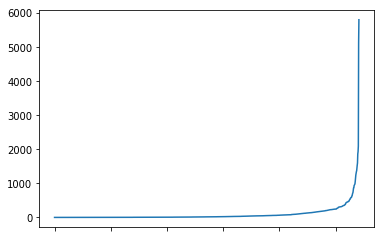

In [18]:
genres = final_df.drop('Band', axis=1).sum()
print(genres.describe())

items = genres.iteritems()
to_remove = set()
for i,item in items:
    if item < 100:
        to_remove.add(i)
print("Columns to remove: ",len(to_remove))
genres.sort_values().plot()

And after droping the genres, we get something more balanced

count     222.000000
mean      375.990991
std       591.629959
min       100.000000
25%       144.250000
50%       213.000000
75%       345.000000
max      5790.000000
dtype: float64


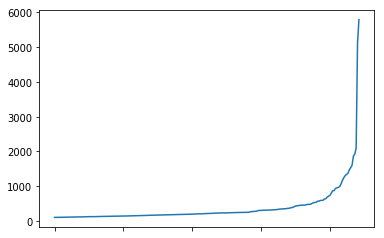

In [22]:
print(genres.describe())
genres.sort_values().plot()

And finally remove all the artists without genres. Having 19785 artists and 223 genres.

In [23]:
final_df = pd.read_csv('../dataset/artists_one_hot_encoded_genres.csv')
final_df = final_df.drop(labels=to_remove, axis=1)
for row in final_df.itertuples():
    if (sum(row[2:]) == 0):
        final_df.drop(row[0], inplace=True)
        
final_df.to_csv('../dataset/artists_final_ohe.csv', index=False)
final_df

,Band,acid,acoustic,adult,age,album,alternative,americana,and,anthem,...,underground,urban,vapor,vintage,viral,vocal,wave,western,world,worship
0,Elijah Blake,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Elin Lanto,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Elio e le Storie Tese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Elis,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Elis Regina,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Elisa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,Elisa Tovati,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,Elisabeth Andreasson,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Elisabeth Lohninger,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,Elisabeth Withers,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 4. Delete lyrics without genre tags
Delete all the lyrics of the artists removed before.

In [ ]:
import pandas as pd
df1 = pd.read_csv('../dataset/Lyrics1.csv')
df2 = pd.read_csv('../dataset/Lyrics2.csv')
df = df1.append(df2, ignore_index=True)
#release memory
del df1, df2

final_df = pd.read_csv('../dataset/artists_final_ohe.csv')

to_remove = set()
for index,row in df.iterrows():
    if(df['Band'].loc[index] not in final_df['Band'].values):
        to_remove.add(index)

df = df.drop(labels=to_remove)
df.to_csv('../dataset/Lyrics.csv', index=False)
df

### 5. Augment by shuffling paragraphs
Since the dataset is still very unbalanced, we will augment it by oversampling the dimmensions with little rows. 

To oversample we simply add a new row with the lyrics paragraph shuffled, the order of the paragraphs in music lyrics isn't as important since the meaning of the song doesn't change.

In [1]:
import pandas as pd

lyrics = pd.read_csv('../dataset/Lyrics.csv', index_col=['Band','Song']).dropna()
genres = pd.read_csv('../dataset/artists_final_ohe.csv', index_col=['Band'])
df = pd.merge(lyrics, genres, on=['Band'])

genres = df.groupby(['Band']).sum().reset_index(drop=True).sum()
genres.sort_values().plot()

count       222.00000
mean      12376.00000
std       19364.22231
min         752.00000
25%        3180.75000
50%        6416.50000
75%       14247.00000
max      182079.00000
dtype: float64


Augment the genres by duplicating those lyrics which genre has less than 50k artists.

In [2]:
import random
df.reset_index(inplace=True)

big_genres = set()
for index,genre_sum in genres.iteritems():
    if(genre_sum > 50000):
        big_genres.add(index)

new_list = list()
for index,row in df.iterrows():
    expand = True
    for big_genre in big_genres:
        if(df[big_genre].iloc[index] == 1):
            expand = False
    if(expand):
        newRow = row.to_dict()
        ly = newRow['Lyrics'].split('\r\r\n\r\r\n')
        random.shuffle(ly, random.random)
        newLy = ''
        for paragraph in ly:
            newLy += paragraph + "\r\r\n\r\r\n"
        newRow['Lyrics'] = newLy
        new_list.append(newRow)
new_df = pd.DataFrame(new_list, columns=df.columns)
df = df.append(new_df)

One more time but genres with less than 25k artists.

In [4]:
import random

genres = df.groupby(['Band']).sum().reset_index(drop=True).sum()
big_genres = set()
for index,genre_sum in genres.iteritems():
    if(genre_sum > 25000):
        big_genres.add(index)

new_list = list()
for index,row in df.iterrows():
    expand = True
    for big_genre in big_genres:
        if(df[big_genre].iloc[index] == 1):
            expand = False
    if(expand):
        newRow = row.to_dict()
        ly = newRow['Lyrics'].split('\r\r\n\r\r\n')
        random.shuffle(ly, random.random)
        newLy = ''
        for paragraph in ly:
            newLy += paragraph + "\r\r\n\r\r\n"
        newRow['Lyrics'] = newLy
        new_list.append(newRow)
new_df = pd.DataFrame(new_list, columns=df.columns)
df = df.append(new_df)
df.reset_index(drop=True, inplace=True)
df.to_csv('../dataset/Lyrics.csv', index=False)

And plot again, this time the dataset is more balanced

count       222.000000
mean      16121.130631
std       21488.050726
min        1068.000000
25%        4640.750000
50%        8715.500000
75%       17824.000000
max      182079.000000
dtype: float64


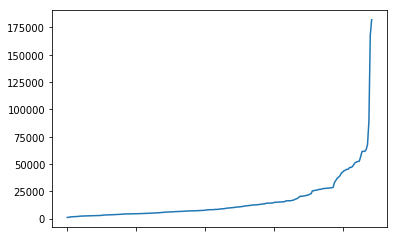

In [9]:
genres = df.groupby(['Band']).sum().reset_index(drop=True).sum()
print(genres.describe())
genres.sort_values().plot()

If we sumarize the genres that have more than 50k songs related and such songs do not have any other genre we end up with 14154 songs. Deleting these is not enough to balance the dataset

In [7]:
import pandas as pd

df = pd.read_csv('../dataset/Lyrics.csv')
genres = df.groupby(['Band']).sum().reset_index(drop=True).sum()

In [ ]:
import sys
big_genres = set()
for index,genre_sum in genres.iteritems():
    if(genre_sum > 50000):
        big_genres.add(index)

to_delete = list()
columns = df.columns
for index,row in df.iterrows():
    delete = False
    if(index % 1000 == 0):
        sys.stdout.write("\r" + str(index))
        sys.stdout.flush()
    for big_genre in big_genres:
        if(df[big_genre].iloc[index] == 1):
            delete = True
    if(delete):
        for col in columns:
            if(df[col].iloc[index] == 1 and col not in big_genres):
                delete = False
                break
    if(delete):
        to_delete.append(index)

len(to_delete)

In [13]:
len(to_delete)

14154

In [2]:
from sklearn.manifold import TSNE
import pandas as pd

final_df = pd.read_csv('../dataset/artists_final_ohe.csv')
tsne = TSNE(n_components=2, init='pca').fit_transform(final_df.loc[:, 'acid':])

In [45]:
final_df.shape

(19785, 223)

In [5]:
import pandas as pd

df = pd.read_csv('../dataset/Lyrics.csv')
genres = df.groupby(['Band']).sum().reset_index(drop=True).sum()

In [32]:
import sys
import random

big_genres = set()
for index,genre_sum in genres.iteritems():
    if(genre_sum > 50000):
        big_genres.add(index)
        
to_delete = list()
columns = df.columns
for index,row in df.iterrows():    
    for big_genre in big_genres:
        if(df[big_genre].iloc[index] == 1 and random.random() < 0.5):
            to_delete.append(index)
            break
    if(index % 1000 == 0):
        sys.stdout.write("\r" + str(index))
        sys.stdout.flush()

len(to_delete)

619000

321263

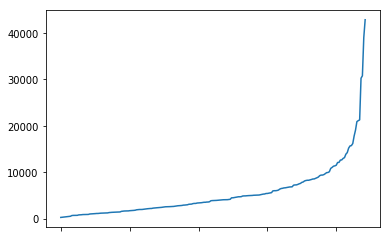

In [33]:
new_df = df.drop(to_delete)
new_genres = new_df.groupby(['Band']).sum().reset_index(drop=True).sum()
new_genres.sort_values().plot()

### 6. Delete non english lyrics
Now work with the lyrics. Delete all non english language lyrics. 56604 lyrics in total. 


In [15]:
import pandas as pd
from langdetect import detect
from langdetect import DetectorFactory 
DetectorFactory.seed = 0

df = pd.read_csv('../dataset/Lyrics.csv')

to_remove = set()
for row in df.itertuples(index=True, name='Pandas'):
    lyric = getattr(row, "Lyrics")
    index = getattr(row, "Index")
    if(index % 1000 == 0):
        sys.stdout.write("\r" + str(index))
        sys.stdout.flush()
    try:
        if detect(lyric) != 'en':
            to_remove.add(index)
            #df.drop(index, inplace=True)            
    except:
        pass

df = df.drop(labels=to_remove)
print("Lyrics dropped ", len(to_remove))
df.to_csv('../dataset/Lyrics_en.csv', index=False)

619000Lyrics dropped  77583


,Band,Lyrics,acid,acoustic,adult,age,album,alternative,americana,and,...,underground,urban,vapor,vintage,viral,vocal,wave,western,world,worship
0,Elijah Blake,"No, no\r\r\r\nI ain't ever trapped out the ban...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Elijah Blake,"The drinks go down and smoke goes up, I feel m...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Elijah Blake,She don't live on planet Earth no more\r\r\r\n...,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Elijah Blake,"Trippin' off that Grigio, mobbin', lights low\...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Elijah Blake,"I see a midnight panther, so gallant and so br...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
genres = df.groupby(['Band']).sum().reset_index(drop=True).sum()
print(genres.describe())
genres.sort_values().plot()

NameError: name 'df' is not defined

### 7. Clean lyrics
Now we delete line breaks, extra spacing and quotes.

In [ ]:
import re

df = pd.read_csv('../dataset/Lyrics_en.csv')
#df = df.iloc[0:100]
df.dropna(axis='index', how='any', inplace=True)


for row in df.itertuples(index=True, name='Pandas'):
    lyric = getattr(row, "Lyrics")
    index = getattr(row, "Index")
    lyric = re.sub('\s+', ' ', lyric)
    df.at[index, 'Lyrics'] = lyric
df.to_csv('../dataset/Lyrics_en.csv', index=False)
df